# 11. Further Issues in Using OLS with Time Series Data

## 11.1. Asymptotics with Time Series

### Example 11.4: Efficient Markets Hypothesis

In [1]:
import wooldridge as woo
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats
from supplementaryFunctions import *

In [2]:
nyse = woo.dataWoo("nyse")

#return is keywords, so rename
nyse.rename(columns={"return":"ret"}, inplace = True)

# build lags
lags = 3
regs = {"Regression":{},
       "Results":{}}
formula = "ret ~ "
for lag in range(1, lags + 1):
    nyse["ret_lag" + str(lag)] = nyse["ret"].shift(lag)
    if lag != 1:
        formula = formula + " + "
    formula = formula + "ret_lag" + str(lag) 
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = nyse)
    regs["Results"][lag] = regs["Regression"][lag].fit()
    
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0035$$,,,,
Intercept,0.1796,2.2248,0.0264,0.0807
ret_lag1,0.0589,1.5490,0.1218,0.0380


In [3]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0048$$,,,,
Intercept,0.1857,2.2889,0.0224,0.0812
ret_lag1,0.0603,1.5799,0.1146,0.0382
ret_lag2,-0.0381,-0.9982,0.3185,0.0381


In [4]:
OLS_summary(regs["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0058$$,,,,
Intercept,0.1794,2.1990,0.0282,0.0816
ret_lag1,0.0614,1.6056,0.1088,0.0382
ret_lag2,-0.0403,-1.0519,0.2932,0.0383
ret_lag3,0.0307,0.8038,0.4218,0.0382


#### Log-Difference and Time Series

The value of differenced logs is approximately the rate of change. We can treat parameter estimates of a regression with log-differenced independent and dependent variables as indicating the percent change in the depedent variable that results from a 1 percent change in the explanatory variable.

$$r_t=log(p_t) - log(p_{t-1}) \approx \frac{p_t - p_{t-1}}{p_{t-1}}$$

In [5]:
tickers = ["AAPL"]
start = datetime.datetime(2007,12,13)
end = datetime.datetime(2016,12,31)

data = pdr.data.DataReader(tickers, "yahoo", start, end)
ret = np.log(data).diff()["Adj Close"]


Text(0, 0.5, 'Apple Daily Returns')

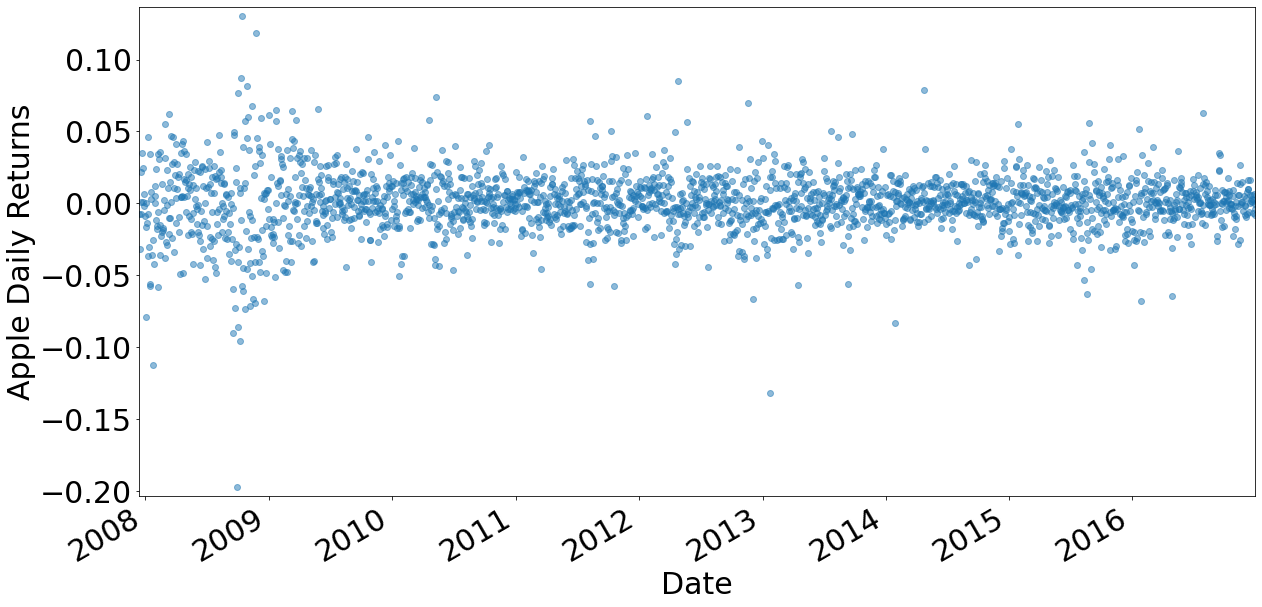

In [6]:
plt.rcParams['axes.ymargin'] = 0.02
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize = (20,10))
ret.plot(legend = False,ls = "", marker = "o", alpha = .5, ax = ax)
ax.set_ylabel("Apple Daily Returns")

In [7]:
lags = 3
regs = {"Regression":{},
       "Results":{}}
formula = "AAPL ~ "
for lag in range(1, lags + 1):
    ret["AAPL_lag" + str(lag)] = ret["AAPL"].shift(lag)
    if lag != 1:
        formula = formula + " + "
    formula = formula + "AAPL_lag" + str(lag) 
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = ret.dropna())
    regs["Results"][lag] = regs["Regression"][lag].fit()
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0$$,,,,
Intercept,0.0007,1.5837,0.1134,0.0004
AAPL_lag1,-0.0011,-0.0513,0.9591,0.0210


In [8]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0008$$,,,,
Intercept,0.0007,1.6623,0.0966,0.0004
AAPL_lag1,-0.0014,-0.0662,0.9472,0.0210
AAPL_lag2,-0.0284,-1.3564,0.1751,0.0210


In [9]:
OLS_summary(regs["Results"][3])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0008$$,,,,
Intercept,0.0007,1.6610,0.0968,0.0004
AAPL_lag1,-0.0015,-0.0732,0.9417,0.0210
AAPL_lag2,-0.0285,-1.3592,0.1742,0.0210
AAPL_lag3,0.0053,0.2549,0.7988,0.0210


## 11.2. The Nature of Highly Persistent Time Series

### Random Walk Hypothesis

$$y_t = y_{t-1} + e_t$$

$$ y_t = y_0 + e_1 + e_2 + ... + e_{t-1} + e_t $$

$$Var(y_t|y_0) = \sigma_e^2t$$

Data that is a random walk is a function of the value in the previous periods (as opposed to being drawn from a distribution whose mean is defined by a constant or a line. Rather, the new value is drawn from a distribution $E$ wherek $\bar{E}$ is a constant. Below, we assume $\bar{E}=0$.

In [10]:
x_range = np.linspace(0, 100, num = 101)
simulations = {}

for r in range(1000):
    e = stats.norm.rvs(0,1, size = 101)
    e[0] = 0
    simulations[r] = np.cumsum(e)
simulations = pd.DataFrame(simulations)
simulations.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.452739,0.172908,-1.966767,-1.347695,0.645939,0.488985,-2.149147,0.683303,0.437129,1.717391,...,-0.545629,0.699774,-0.178553,-0.306656,0.409056,0.864372,1.050186,-0.806297,-0.368274,1.102149
2,1.946280,0.371483,-2.322819,-0.700518,1.953106,0.001205,-0.939420,-0.366682,0.102747,0.764928,...,-0.407274,1.206023,-1.554850,-1.546685,-0.259007,1.245272,0.747900,-0.370694,0.219764,1.004070
3,2.092953,-0.322769,-3.688802,-2.033841,3.554716,0.569970,-0.124436,-1.531424,1.099606,0.566132,...,-0.659030,0.185333,-2.662913,1.066708,0.305114,-0.264721,0.053988,-1.339189,0.308938,0.851658
4,2.648715,-1.144364,-1.437561,-3.481875,3.121459,0.100654,0.272646,-2.336462,-0.719550,0.305407,...,-0.454310,0.438335,-1.601516,3.385438,0.399128,0.579017,0.971033,-0.354853,0.775017,0.409882


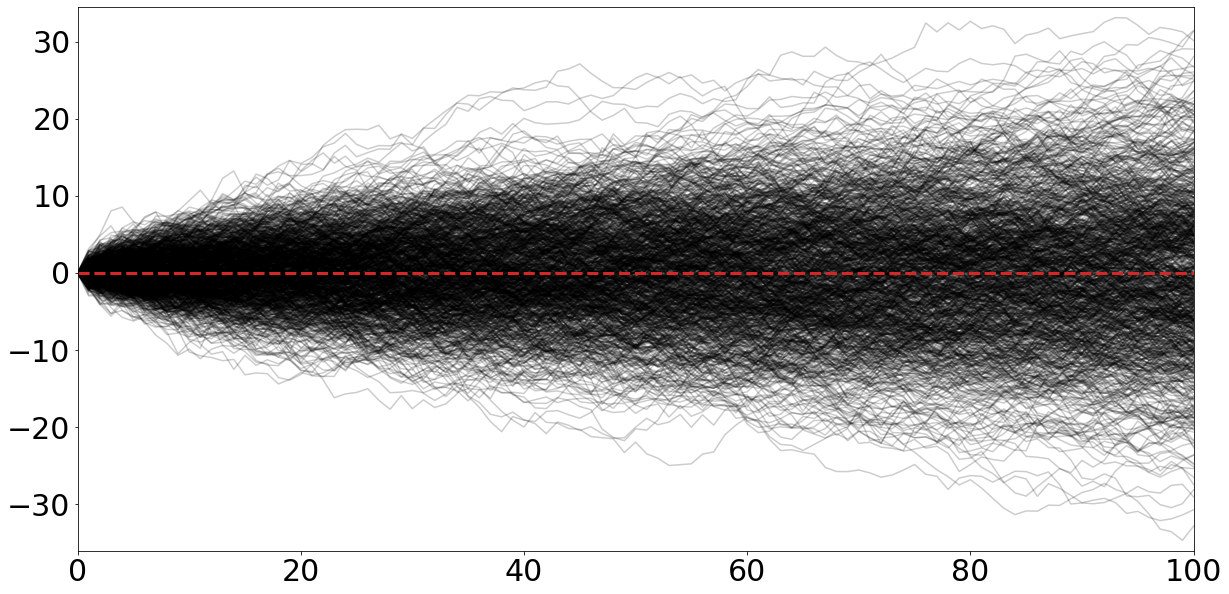

In [11]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .2, color = "k", ax = ax, legend = False)
ax.axhline(0, ls = "--", color = "C3", linewidth = 3)


If that $\bar{E} \ne 0$, the the the function is described as a random walk with drift. We describe $\bar{E}$ as $\alpha_0$.

$$y_t = \alpha_0 + y_{t-1} + e_t$$

$$ y_t = y_0 + \alpha_0t + e_1 + e_2 + ... + e_{t-1} + e_t $$

In [12]:
def monte_carlo_simulation(e_bar = 0, periods = 101, num_simulations = 100):
    x_range = np.linspace(0, periods - 1, 
                          num = periods)
    simulations = {}
    for r in range(num_simulations):
        e = stats.norm.rvs(e_bar, 1, size = periods)
        e[0] = 0
        simulations[r] = np.cumsum(e)
    simulations = pd.DataFrame(simulations)
    return simulations

e_bar = 2
periods = 100
num_simulations = 5000
simulations = monte_carlo_simulation(e_bar = e_bar, 
                                     periods = periods, 
                                     num_simulations = num_simulations)
simulations

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.464691,2.574539,2.470930,2.511157,2.483115,1.836656,1.488831,1.635722,2.914325,2.497397,...,2.792929,2.816877,2.055042,0.836401,1.176421,1.038980,1.247454,1.318382,2.080911,2.582585
2,0.509922,2.569309,4.722672,5.461108,2.562429,4.909695,3.916512,3.840180,5.972123,3.777576,...,4.057709,2.927827,4.250370,2.572306,3.699514,2.688388,4.091713,2.094173,3.586450,4.710106
3,1.335759,5.277457,7.434098,7.372979,5.092047,5.998082,4.348393,4.694784,8.293866,5.637629,...,4.933328,5.971598,5.468798,2.911202,6.985905,5.689142,4.482112,3.720033,6.811342,8.818393
4,4.088202,7.439132,8.158511,9.496450,7.423042,7.718493,7.253806,5.785808,8.775753,8.889867,...,6.890301,9.088316,7.308912,3.252535,9.844616,6.706733,7.097000,5.900466,6.542339,9.257471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,182.537643,191.786168,192.258143,183.159762,201.013113,202.141984,181.392694,174.307196,197.520090,223.578259,...,173.589601,191.096397,186.697645,185.212710,200.093276,201.278415,186.773006,171.158584,176.566554,178.191878
96,184.062268,194.376934,194.193395,185.392744,201.353820,206.843124,185.497655,173.990113,200.357525,225.659847,...,175.957658,194.761262,189.488174,187.041417,203.562015,203.788241,188.119225,173.161349,178.408017,180.765817
97,187.650288,196.239167,193.852710,187.567124,203.769281,210.478229,186.769636,177.045862,202.885220,225.786064,...,177.025631,197.954703,193.078142,188.011362,204.650761,203.901537,189.555322,174.453719,180.522788,180.818476
98,189.260251,199.263522,195.173975,190.281797,206.978864,213.064460,189.407865,179.610786,206.234768,226.752443,...,177.712903,201.445142,194.576806,189.927243,206.487870,206.807518,191.540893,176.743303,184.079706,185.598248


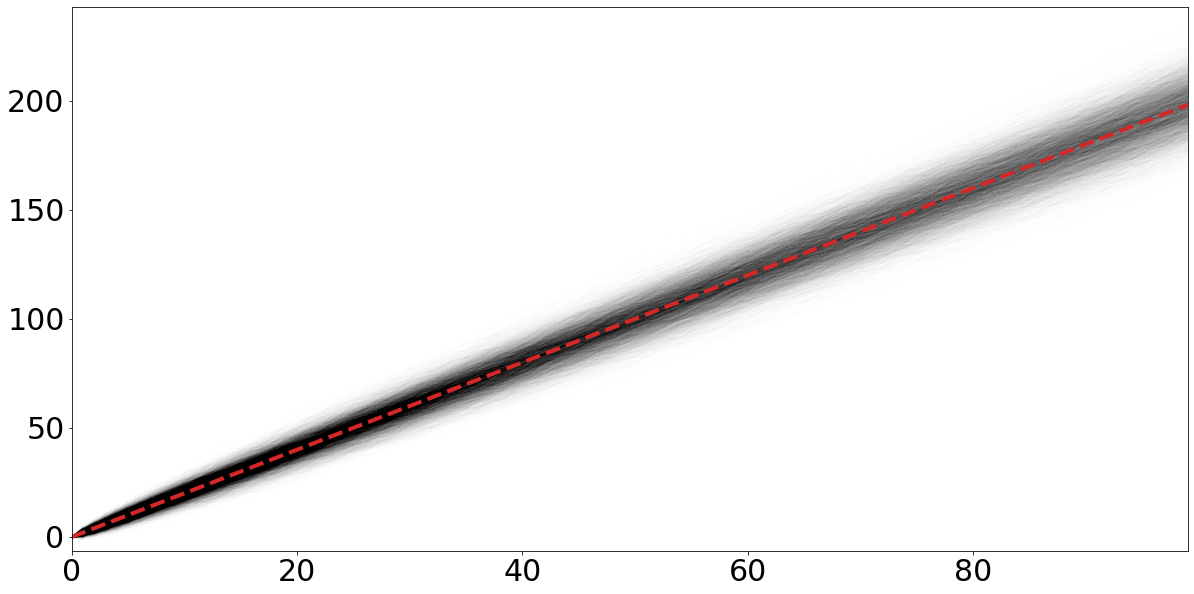

In [13]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.plot.line(alpha = .005, 
                      color = "k", 
                      ax = ax, 
                      legend = False)
ax.plot(np.arange(periods), np.arange(periods) * e_bar, ls = "--", color = "C3", linewidth = 4)


## 11.3. Differences of Highly Persistent Time Series


In [14]:
simulations.diff()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.464691,2.574539,2.470930,2.511157,2.483115,1.836656,1.488831,1.635722,2.914325,2.497397,...,2.792929,2.816877,2.055042,0.836401,1.176421,1.038980,1.247454,1.318382,2.080911,2.582585
2,0.974613,-0.005229,2.251742,2.949951,0.079314,3.073039,2.427682,2.204458,3.057798,1.280179,...,1.264780,0.110950,2.195328,1.735905,2.523093,1.649407,2.844260,0.775791,1.505539,2.127521
3,0.825836,2.708147,2.711425,1.911871,2.529619,1.088387,0.431881,0.854605,2.321744,1.860053,...,0.875619,3.043771,1.218428,0.338896,3.286392,3.000754,0.390399,1.625861,3.224892,4.108287
4,2.752443,2.161675,0.724414,2.123471,2.330994,1.720411,2.905413,1.091024,0.481886,3.252238,...,1.956973,3.116718,1.840114,0.341333,2.858710,1.017591,2.614888,2.180433,-0.269003,0.439077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.694260,1.455275,2.296204,0.552003,1.379727,2.834943,2.624758,1.327856,2.718245,0.735598,...,2.974792,2.955486,0.492310,2.308851,0.493271,1.283627,1.128375,1.812683,1.265347,2.222204
96,1.524625,2.590766,1.935252,2.232982,0.340706,4.701140,4.104961,-0.317083,2.837435,2.081588,...,2.368057,3.664865,2.790529,1.828707,3.468739,2.509826,1.346219,2.002766,1.841463,2.573938
97,3.588021,1.862234,-0.340685,2.174380,2.415462,3.635105,1.271982,3.055749,2.527695,0.126218,...,1.067973,3.193441,3.589969,0.969945,1.088747,0.113296,1.436096,1.292370,2.114772,0.052659
98,1.609963,3.024355,1.321265,2.714674,3.209582,2.586232,2.638229,2.564924,3.349548,0.966378,...,0.687272,3.490440,1.498663,1.915881,1.837108,2.905980,1.985572,2.289584,3.556917,4.779772


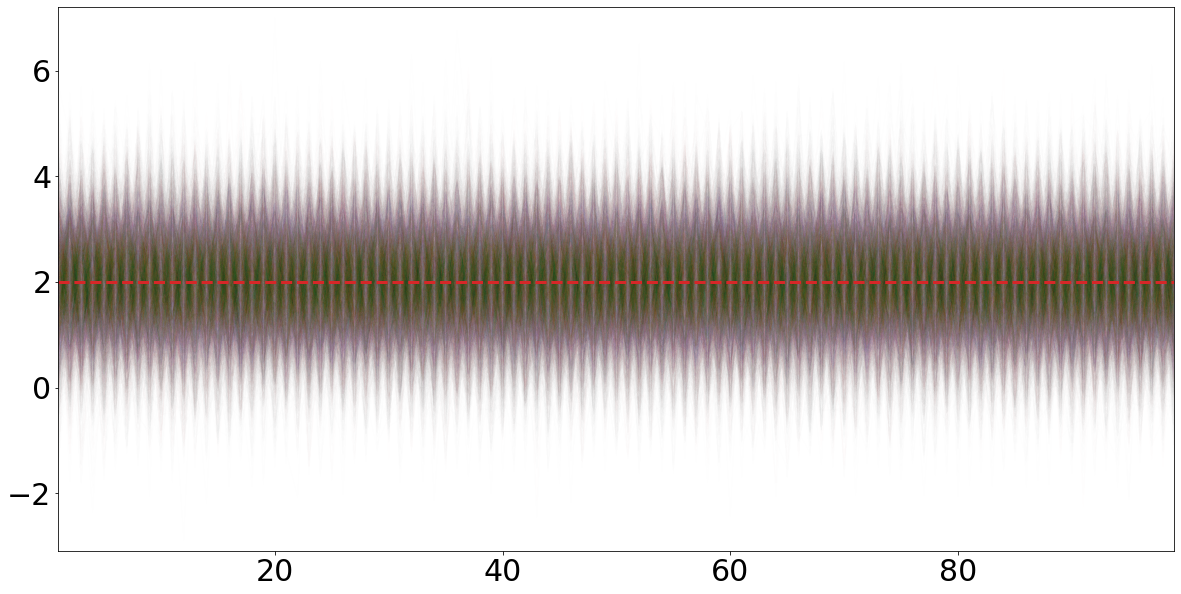

In [15]:
fig, ax = plt.subplots(figsize = (20,10))
simulations.diff().plot.line(alpha = .004,
                      ax = ax, 
                      legend = False)
ax.axhline(e_bar, ls = "--", color = "C3", linewidth = 3)


### Example 11.6: Fertility Equation

In [30]:
fertil3 = woo.dataWoo("fertil3")
periods = len(fertil3)
# calling from pd.date_range().year includes only the year value, does not assert month and day
fertil3.index = pd.date_range(start="1913",periods = periods,freq="Y").year
fertil3 = fertil3.diff()
fertil3

,gfr,pe,year,t,tsq,pe_1,pe_2,pe_3,pe_4,pill,...,cpe_1,cpe_2,cpe_3,cpe_4,gfr_1,cgfr_1,cgfr_2,cgfr_3,cgfr_4,gfr_2
1913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1914,1.900002,0.000000,1.0,1.0,3.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1915,-1.599998,0.000000,1.0,1.0,5.0,0.000000,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,1.900002,NaN,NaN,NaN,NaN,NaN
1916,-1.599998,0.000000,1.0,1.0,7.0,0.000000,0.000000,NaN,NaN,0.0,...,0.000000,NaN,NaN,NaN,-1.599998,-3.500000,NaN,NaN,NaN,1.900002
1917,-2.400002,19.270000,1.0,1.0,9.0,0.000000,0.000000,0.000000,NaN,0.0,...,0.000000,0.000000,NaN,NaN,-1.599998,0.000000,-3.500000,NaN,NaN,-1.599998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1980,1.200005,-9.759995,1.0,1.0,135.0,13.949989,2.870003,-3.970001,-2.279999,0.0,...,11.079987,6.840004,-1.690002,5.850006,1.699997,3.000000,-2.300003,1.199997,2.200005,-1.300003
1981,-1.000000,-3.860001,1.0,1.0,137.0,-9.759995,13.949989,2.870003,-3.970001,0.0,...,-23.709984,11.079987,6.840004,-1.690002,1.200005,-0.499992,3.000000,-2.300003,1.199997,1.699997
1982,-0.099998,-17.269997,1.0,1.0,139.0,-3.860001,-9.759995,13.949989,2.870003,0.0,...,5.899994,-23.709984,11.079987,6.840004,-1.000000,-2.200005,-0.499992,3.000000,-2.300003,1.200005
1983,-1.500000,-9.550003,1.0,1.0,141.0,-17.269997,-3.860001,-9.759995,13.949989,0.0,...,-13.409996,5.899994,-23.709984,11.079987,-0.099998,0.900002,-2.200005,-0.499992,3.000000,-1.000000


In [31]:
lags = 2
regs = {"Regression":{},
       "Results":{}}
formula = "gfr ~ pe"
for lag in range(lags + 1):
    if lag > 0:
        fertil3["pe_lag" + str(lag)] = fertil3["pe"].shift(lag)
        formula = formula + "+ pe_lag" + str(lag)
    
    regs["Regression"][lag] = smf.ols(formula = formula,
                                     data = fertil3)
    regs["Results"][lag] = regs["Regression"][lag].fit()
OLS_summary(regs["Results"][0])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0318$$,,,,
Intercept,-0.7848,-1.5632,0.1226,0.5020
pe,-0.0427,-1.5045,0.1370,0.0284


In [32]:
OLS_summary(regs["Results"][1])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.0347$$,,,,
Intercept,-0.8373,-1.6362,0.1065,0.5117
pe,-0.0456,-1.5491,0.1261,0.0295
pe_lag1,0.0134,0.4542,0.6511,0.0295


In [33]:
OLS_summary(regs["Results"][2])

,$\beta $,$t$,$$P>|t|$$,$SE$
$$r^2: 0.2325$$,,,,
Intercept,-0.9637,-2.0602,0.0434,0.4678
pe,-0.0362,-1.3522,0.1810,0.0268
pe_lag1,-0.0140,-0.5070,0.6139,0.0276
pe_lag2,0.1100,4.0919,0.0001,0.0269
